In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Visualize the dataset

Target labels:  [6 1 6 4 8 1 2 9 0 9]


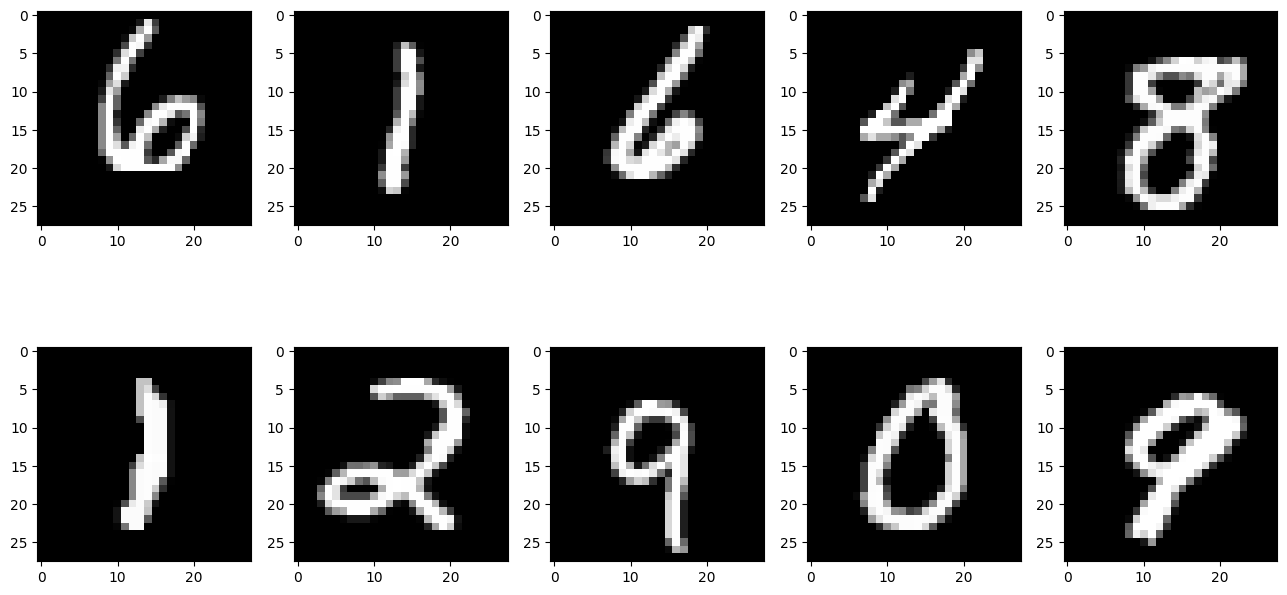

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2909 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1296 - accuracy: 0.9605
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0936 - accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0759 - accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0625 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0523 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0452 - accuracy: 0.9852
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0400 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9881
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

Plot the loss and accuracy graphs

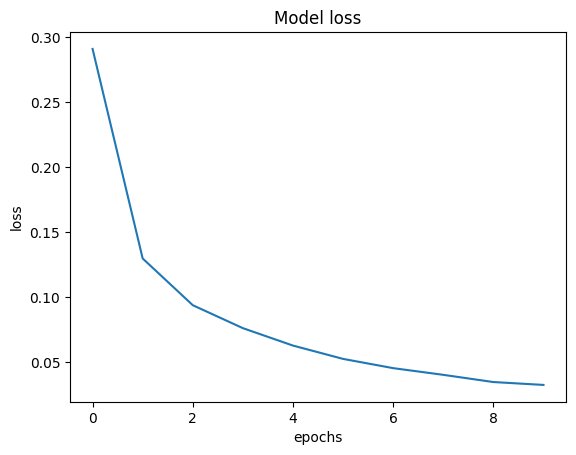

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

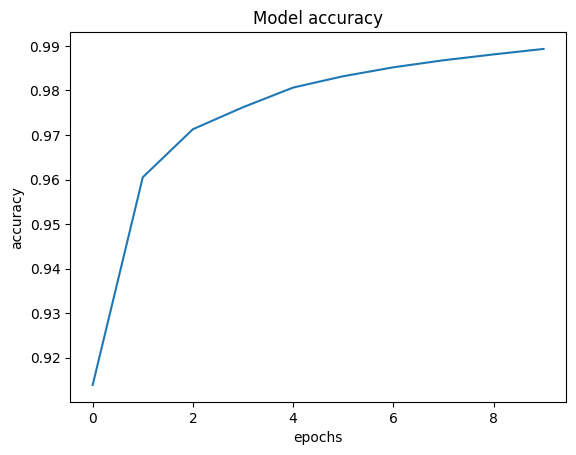

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [5]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

NameError: name 'model' is not defined

Save the model weights

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Target labels:  [4 1 2 9 9 5 5 2 3 4]


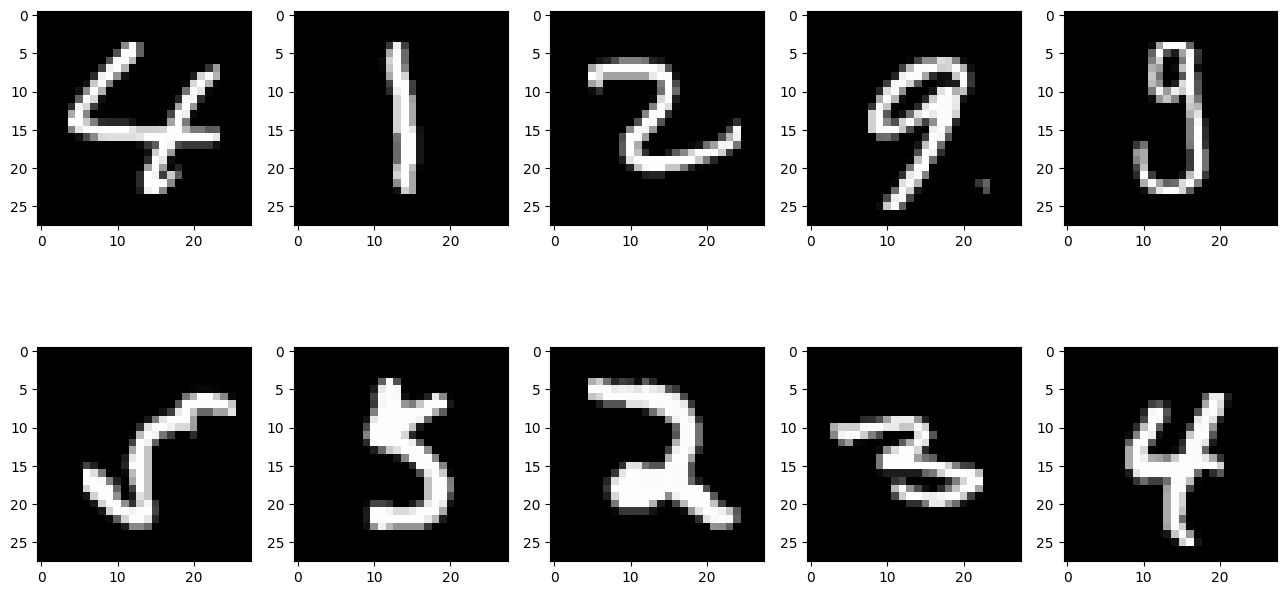

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8333 - loss: 0.6193 - val_accuracy: 0.9565 - val_loss: 0.2085
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9624 - loss: 0.1910 - val_accuracy: 0.9688 - val_loss: 0.1657
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9741 - loss: 0.1541 - val_accuracy: 0.9729 - val_loss: 0.1565
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9790 - loss: 0.1369 - val_accuracy: 0.9714 - val_loss: 0.1556
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9822 - loss: 0.1240 - val_accuracy: 0.9720 - val_loss: 0.1554
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9845 - loss: 0.1175 - val_accuracy: 0.9707 - val_loss: 0.1609
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9866 - loss: 0.1094 - val_accuracy: 0.9763 - val_loss: 0.1440
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9871 - loss: 0.1077 - val_accuracy: 0

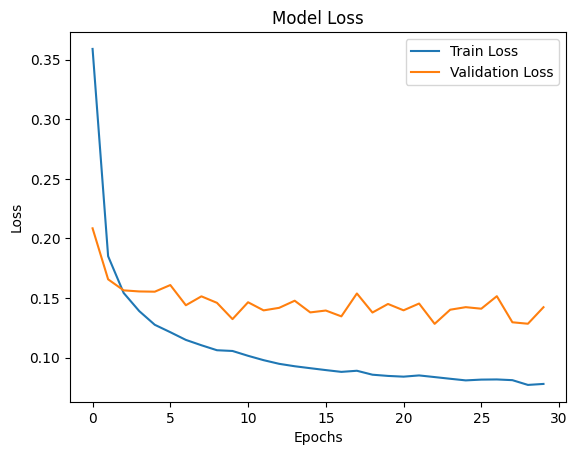

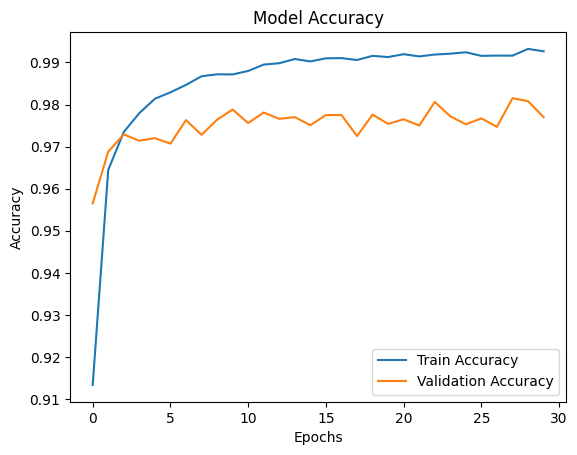

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


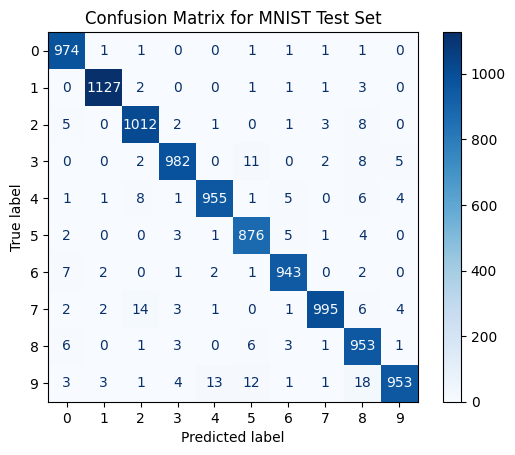

In [6]:
# Imports
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Load dataset
(train_data, train_target), (test_data, test_target) = mnist.load_data()

# Normalize data
train_data = train_data / 255.0
test_data = test_data / 255.0

# One-hot encode labels
train_target = to_categorical(train_target, 10)
test_target = to_categorical(test_target, 10)

# Visualize 10 random images
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, train_data.shape[0], 10)
print('Target labels: ', np.argmax(train_target[random_numbers], axis=1))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]], cmap='gray')
plt.show()

# Define model with L1/L2 regularization
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
train_info = model.fit(train_data, train_target,
                       validation_data=(test_data, test_target),
                       epochs=30, batch_size=64)

# Plot training loss
plt.plot(train_info.history['loss'], label='Train Loss')
plt.plot(train_info.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(train_info.history['accuracy'], label='Train Accuracy')
plt.plot(train_info.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Confusion matrix for test set
y_pred = np.argmax(model.predict(test_data), axis=1)
y_true = np.argmax(test_target, axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MNIST Test Set')
plt.show()